## Step 1: Import Libraries
Here, we import the required libraries:
- `NumPy` and `Pandas` for numerical and data manipulation.
- `Matplotlib` and `Seaborn` for data visualization.
- `sklearn` for model training, evaluation, and splitting data.


In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Step 2: Load and Explore the Dataset
The dataset is loaded into a Pandas DataFrame. The first few rows are displayed to understand its structure. Ensure the dataset contains:
- Multiple features as predictors.
- A target variable for prediction.


In [3]:
data = pd.read_csv('Marketing_Data.csv')

In [4]:
data.head(10)

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
5,114.84,1.68,8.88,11.40
6,348.84,4.92,10.20,15.36
7,320.28,52.56,6.00,30.48
8,89.64,59.28,54.84,17.64
9,51.72,32.04,42.12,12.12


## Step 3: Data Preprocessing
- Check for missing values and handle them (e.g., dropping or imputing).
- Encode categorical features (if present) using techniques like one-hot encoding.
- Display basic statistics for an overview of the data distribution.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [6]:
data.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


## Step 4: Define Features and Target
- The features (`x`) include multiple columns that predict the target.
- The target variable (`y`) is the column to be predicted.


In [8]:
x = data[['youtube' , 'facebook' , 'newspaper']]
y= data['sales']

In [9]:
x.head()

,youtube,facebook,newspaper
0,84.72,19.20,48.96
1,351.48,33.96,51.84
2,135.48,20.88,46.32
3,116.64,1.80,36.00
4,318.72,24.00,0.36


In [10]:
y.head()

0    12.60
1    25.68
2    14.28
3    11.52
4    20.88
Name: sales, dtype: float64

## Step 5: Split the Data
Split the dataset into:
- Training set (80%) for model training.
- Testing set (20%) for model evaluation.

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=43)

In [12]:
x_train.shape

(136, 3)

In [13]:
y_train.shape

(136,)

In [14]:
x_test.shape

(35, 3)

## Step 6: Train the Model
A **Linear Regression** model is initialized and trained using the training data.


In [16]:
model = LinearRegression()

In [17]:
model.fit(x_train,y_train)

LinearRegression()

## Step 7: Evaluate the Model
The model is evaluated using:
- **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values.
- **R-squared**: Indicates the proportion of variance in the target variable explained by the features.


In [20]:
# Evaluate the model
y_pred = model.predict(x_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2.5825764839525314
R-squared: 0.9347288995616291


## Step 8: Visualize the Results
A scatter plot compares the **actual** and **predicted** values:
- The red dashed line represents the ideal case where predictions match actual values.
- Points close to the line indicate better predictions.


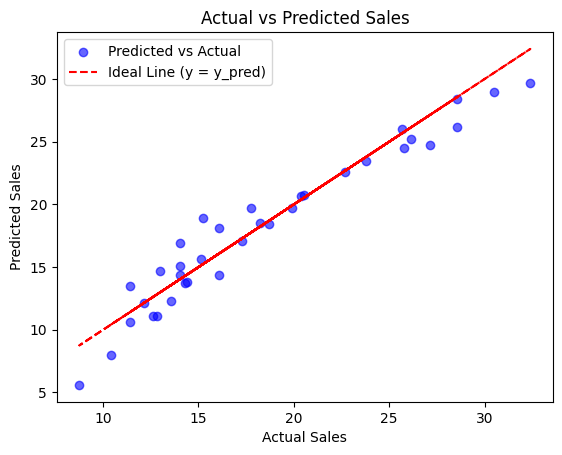

In [22]:
# Scatter plot for comparison of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Ideal Line (y = y_pred)')
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend()
plt.show()


## Step 9: Compare Actual and Predicted Sales

A DataFrame is created to compare:
1. **Actual Sales**: The true values from the test set.
2. **Predicted Sales**: The values predicted by the model.
3. **Error (Actual - Predicted)**: The difference between actual and predicted values.

This comparison provides insights into where the model performs well and where it struggles.


In [23]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual Sales': y_test,
    'Predicted Sales': y_pred,
    'Error (Actual - Predicted)': y_test - y_pred
})

# Display the first few rows
print(comparison_df.head())


     Actual Sales  Predicted Sales  Error (Actual - Predicted)
38          16.08        14.370891                    1.709109
10          25.80        24.469079                    1.330921
125         18.72        18.472663                    0.247337
67          14.04        15.121941                   -1.081941
2           14.28        13.749619                    0.530381


## Conclusion

The Multi-Linear Regression model was applied to predict **Sales** based on advertising investments in **YouTube**, **Facebook**, and **Newspaper**. The following observations were made:

1. **Performance Metrics**:
   - **R² Score**: 0.93  
     - Indicates that 93% of the variability in **Sales** is explained by the advertising budgets on **YouTube**, **Facebook**, and **Newspaper**.
   - **Mean Squared Error (MSE)**: 2.58  
     - Suggests that, on average, the squared difference between the predicted and actual sales values is small, indicating good model accuracy.

2. **Key Insights**:
   - Advertising on platforms like **YouTube** and **Facebook** might have a significant influence on predicting sales, as they likely contribute heavily to the high R² score.
   - The contribution of **Newspaper** advertisements could be further analyzed to determine its relevance compared to digital platforms.

3. **Conclusion**:
   - The model demonstrates that advertising budgets on the given platforms strongly correlate with **Sales**.
   - Investments in **YouTube** and **Facebook** appear to be more impactful than traditional **Newspaper** advertising, based on the regression model's performance.

4. **Future Improvements**:
   - Analyze feature importance to determine which advertising medium contributes the most to sales.
   - Experiment with other models or include interaction terms between platforms to capture any combined effects.
   - Investigate if additional variables (e.g., demographic data, seasonality) could further enhance predictions.

The project highlights the practical application of Multi-Linear Regression for evaluating and optimizing advertising strategies.


##  Save the Model

To make the model reusable without retraining, it is saved using **Joblib**.

- **Joblib** is a library optimized for saving and loading Python objects, particularly NumPy arrays, making it suitable for machine learning models.
- The model is saved as a file named `multi_linear_model.joblib`.

### Benefits:
1. The model can be loaded later for predictions without retraining.
2. This allows for deployment in applications or further testing.

The saved file can be found in the current working directory.


In [24]:
# Save the model using Joblib
import joblib

# Save the trained model to a file
joblib.dump(model, 'multi_linear_model.joblib')

print("Model saved as 'multi_linear_model.joblib'")


Model saved as 'multi_linear_model.joblib'
